## Pandas를 사용하기 전 분석 단계

In [10]:
from sklearn import svm, metrics
import random, re

csv = []
with open('iris.csv', 'r', encoding='utf-8') as fp:
    for line in fp:
        line = line.strip() # 줄바꿈 제거
        cols = line.split(',') # 쉼표로 자르기
        # 문자열 데이터 숫자로 변환하기
        fn = lambda n : float(n) if re.match(r'^[0-9\.]+$', n) else n
        cols = list(map(fn, cols))
        csv.append(cols)
        
# 가장 앞 줄의 헤더 제거
del csv[0]

# 데이터 셔플
random.shuffle(csv)

# 학습 전용 데이터와 테스트 전용 데이터 분할하기 (2:1 비율)
total_len = len(csv)
train_len = int(total_len * 2/3)
train_data = []
train_label = []
test_data = []
test_label = []

for i in range(total_len):
    data = csv[i][0:4]
    label = csv[i][4]
    if i < train_len:
        train_data.append(data)
        train_label.append(label)
    else:
        test_data.append(data)
        test_label.append(label)

# 데이터를 학습시키고 예측하기
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

# 정답률 구하기
ac_score = metrics.accuracy_score(test_label, pre)
print("정답률 =", ac_score)

정답률 = 0.94


## 훈련 전용 데이터와 테스트 전용 데이터로 분할하는 메서드
---

In [ ]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

csv = pd.read_csv('iris.csv')

# 필요한 열 추출하기
csv_data = csv[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
csv_label = csv['Name']

# 학습 전용 데이터와 테스트 전용 데이터로 나누기
train_data, test_data, train_label, test_label = \
    train_test_split(csv_data, csv_label)
    
# 데이터 학습시키고 예측하기
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

# 정답률 구하기
ac_score = metrics.accuracy_score(test_label, pre)
print("정답률 =", ac_score)

## MNIST 손글씨 분석
---

In [16]:
import urllib.request as req
import gzip, os, os.path

savepath = "./mnist"
baseurl = "http://yann.lecum.com/exdb/mnist"
files = [
    "train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubype.gz",
    "t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz"
]

# Download
if not os.path.exists(savepath): os.mkdir(savepath)
for f in files:
    url = baseurl + "/" + f
    loc = savepath + "/" + f
    print("download:", url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)
        
# GZip 압축 해제
for f in files:
    gz_file = savepath + "/" + f
    raw_file = savepath + "/" + f.replace(".gz", "")
    print("gzip:", f)
    with gzip.open(gz_file, "rb") as fp:
        body = fp.read()
        with open(raw_file, "wb") as w:
            w.write(body)
print("OK")

download: http://yann.lecum.com/exdb/mnist/train-images-idx3-ubyte.gz


URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

## 이미지 픽셀 데이터를 벡터로 넣어 학습시키는 프로그램

In [18]:
from sklearn import model_selection, svm, metrics

# CSV 파일 읽고 가공하기
def load_csv(fname):
    labels = []
    images = []
    
    with open(fname, 'r') as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2: continue
            labels.append(int(cols.pop(0)))
            vals = list(map(lambda n: int(n) / 256, cols))
            images.append(vals)
    return {"labels": labels, "images": images}

data = load_csv("./mnist/train.csv")
test = load_csv("./mnist/t10k.csv")

# 학습하기
clf = svm.SVC()
clf.fit(data["images"], data["labels"])

# 예측하기
predict = clf.predict(test["images"])

# 결과 확인하기
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("정답률 =", ac_score)
print("리포트 =")
print(cl_report)

FileNotFoundError: [Errno 2] No such file or directory: './mnist/train.csv'

## 외국어 문장 판별하기
---
- 알파벳을 사용하는 자연 언어가 어떤 나라의 말인지 판정하는 프로그램

In [48]:
from sklearn import svm, metrics
import glob, os.path, re, json

# 텍스트르 읽고 출현 빈도 조사
def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match(r"^[a-z]{2,}", name).group() # 정규식 알아야함
    print(name, lang)
    
    with open(fname, "r", encoding='utf-8')as f:
        text = f.read()
    text = text.lower()
    
    cnt = [0 for n in range(26)]
    code_a = ord("a") # ord() 함수 : 특정한 한 문자를 아스키 코드 값으로 변환해 주는 함수
    code_z = ord("z")
    
    print(cnt)
    # 알파벳 출현 횟수 구하기
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z: # a~z 사이에 있을 때
            cnt[n - code_a] += 1
    print(cnt)    
    # 정규화 하기
    total = sum(cnt)
    freq = list(map(lambda n: n / total, cnt)) # 출현 횟수를 출현 빈도로 변환 -> 각 텍스트 파일에 있는 문자 수가 다르므로 출현 횟수를 비교하면 동일한 규칙이 적용되지 않기 때문
    print(freq)
    print("\n")
    return (freq, lang)

# 각 파일 처리하기
def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
    for fname in file_list:
        r = check_freq(fname)
        print("R = ", r)
        freqs.append(r[0])
        print(freqs)
        labels.append(r[1])
        print(labels)
    return {"freqs": freqs, "labels": labels}

data = load_files("./lang/train/*.txt")
test = load_files("./lang/test/*.txt")


# 이후를 대비하여 JSON으로 결과 저장
with open("./lang/freq.json", "w", encoding="utf-8") as fp:
    json.dump([data, test], fp)
    
# 학습하기
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

# 예측하기
predict = clf.predict(test["freqs"])

# 결과 테스트
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("정답률 =", ac_score)
print("리포트 =")
print(cl_report)

tl-20.txt tl
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1469, 165, 142, 269, 466, 42, 240, 49, 548, 17, 107, 367, 173, 834, 491, 224, 13, 286, 472, 335, 202, 35, 42, 3, 246, 22]
[0.20236947237911557, 0.02273040363686458, 0.0195619231299077, 0.03705744592919135, 0.06419617027138724, 0.0057859209257473485, 0.033062405289984845, 0.006750241080038573, 0.07549249207879873, 0.00234192037470726, 0.014740322358451578, 0.0505579280892685, 0.02383248381319741, 0.11489185838269735, 0.06764017082242733, 0.03085824493731919, 0.0017908802865408459, 0.039399366303898606, 0.06502273040363686, 0.04614960738393718, 0.027827524452403912, 0.0048216007714561235, 0.0057859209257473485, 0.00041328006612481057, 0.03388896542223447, 0.0030307204849152774]


R =  ([0.20236947237911557, 0.02273040363686458, 0.0195619231299077, 0.03705744592919135, 0.06419617027138724, 0.0057859209257473485, 0.033062405289984845, 0.006750241080038573, 0.07549249207879873, 0.00234192037470726, 

## 데이터마다의 분포를 그래프로 확인하기
---

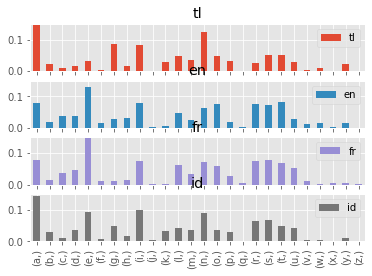

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# 알파벳 출현 빈도 데이터 읽기
with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    freq = json.load(fp)

# 언어마다 계산하기
lang_dic = {}
for i, lbl in enumerate(freq[0]["labels"]):
    fq = freq[0]["freqs"][i]
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v) / 2
        
# Pandas의 DataFrame에 데이터 넣기
asclist = [[chr(n) for n in range(97, 97 + 26)]]
df = pd.DataFrame(lang_dic, index=asclist)

# 그래프 그리기
plt.style.use('ggplot')
df.plot(kind="bar", subplots=True, ylim=(0,0.15))
plt.savefig("lang-plot.png")

In [56]:
from sklearn import svm
import joblib
import json

# 각 언어의 출현 빈도 데이터(JSON) 읽기
with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    d = json.load(fp)
    data = d[0]
    
# 데이터 학습하기
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

# 학습 데이터 저장하기
joblib.dump(clf, "./lang/freq.pkl")
print("ok")

ok


## 랜덤 포레스트 사용하기
---

In [1]:
import urllib.request as req
local = "mushroom.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, local)
print("OK")

OK


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 데이터 읽기 (*1)
mr = pd.read_csv("mushroom.csv", header=None)

# 데이터 내부의 기호를 숫자로 변환 (*2)
label = []
data = []
attr_list = []

for row_index, row in mr.iterrows():
    label.append(row.ix[0])
    row_data = []
    for v in row.ix[1:]:
        row_data.append(ord(v))
    data.append(row_data)

# 학습 전용과 테스트 전용 데이터로 나누기 (*3)
data_train, data_test, label_train, label_test = \
    train_test_split(data, label)
    
# 데이터 학습 시키기 - (*4)
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

# 데이터 예측하기 - (*5)
predict = clf.predict(data_test)

# 결과 테스트 - (*6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률=", ac_score)
print("리포트\n", cl_report)

AttributeError: 'Series' object has no attribute 'ix'

### 데이터를 숫자로 변경할 때 주의할 사항
```python
    빨강=1, 파랑=2, 초록=3, 흰색=4
```
- 각각의 데이터는 그냥 순서대로 할당했을 뿐 아무런 관련이 없다.
- 이를 보다 직관적으로 상관없음을 나타내기 위해 다음과 같은 배열로 나타낸다.
```python
    빨강 = 1 0 0 0
    파랑 = 0 1 0 0
    초록 = 0 0 1 0
    흰색 = 0 0 0 1
```
- 데이터의 용량은 늘어나지만 색끼리 전혀 관련성이 없다는 의미가 생긴다

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 데이터 읽어들이기
mr = pd.read_csv("mushroom.csv", header=None)

# 데이터 내부의 분류 변수 전개하기
label, data, attr_list = [], [], []
for row_index, row in mr.iterrows():
    label.append(row.ix[0])
    exdata = []
    for col, v in enumerate(row.ix[1:]):
        if row_index == 0:
            attr = {"dic": {}, "cnt": 0}
            attr_list.append(attr)
        else:
            attr = attr_list[col]
        # 버섯의 특징 기호를 배열로 나타내기
        d = [0,0,0,0,0,0,0,0,0,0,0,0]
        if v in attr["dic"]:
            idx = attr["dic"][v]
        else:
            idx = attr["cnt"]
            attr["dic"][v] = idx
            attr["cnt"] += 1
        d[idx] = 1
        exdata += d
    data.append(exdata)

# 학습 전용 데이터와 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = \
    train_test_split(data, label)
    
# 데이터 학습시키기
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

# 데이터 예측하기
predict = clf.predict(data_test)

# 결과 테스트하기
ac_score = metrics.accuracy_score(label_test, predict)
print("정답률=", ac_score)

AttributeError: 'Series' object has no attribute 'ix'

In [24]:
# 크로스 벨리데이션 사용하기
from sklearn import svm, metrics
import random, re

# 붓꽃의 csv 파일 읽어들이기 - (*1)
lines = open('iris.csv', 'r', encoding='utf-8').read().split('\n')
f_tonum = lambda n : float(n) if re.match(r'^[0-9\.]+$', n) else n
f_cols = lambda li: list(map(f_tonum, li.strip().split(',')))
csv = list(map(f_cols, lines))
del csv[0] # 헤더 제거하기
random.shuffle(csv) # 데이터 섞기

In [42]:
# scikit-learn의 크로스 벨리데이션을 사용한 코드
import pandas as pd
from sklearn import svm, metrics, model_selection
import random, re

# 붓꽃 CSV 데이터
csv = pd.read_csv('iris.csv')
print(csv)
# 리스트를 훈련 전용 데이터와 테스트 전용 데이터로 분할하기
data = csv[["sepal.length", "sepal.width", "petal.length", "petal.width"]]
label = csv["variety"]

# 크로스벨리에디션
clf = svm.SVC()
scores = model_selection.cross_val_score(clf, data, label, cv=5)
print("각각의 정답률=", scores)
print("평균 정답률=", scores.mean())

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]
각각의 정답률= [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
평균 정답률= 0.9666666666666666
